# **Airbnb Listings & Reviews**

Airbnb data for 250,000+ listings in 10 major cities, including information about hosts, pricing, location, and room type, along with over 5 million historical reviews.

### Data Dictionary
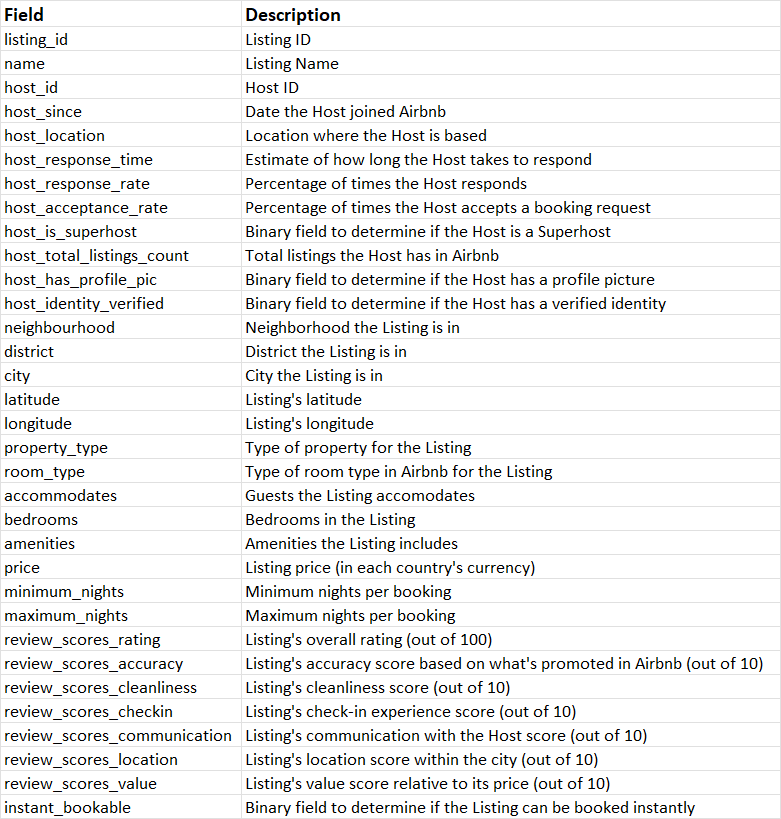

### **Loading Data**

In [1]:
# importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading  data from drive
data = pd.read_csv('/content/drive/My Drive/Airbnb Listings/Listings.csv', encoding='latin1')

<ipython-input-3-9ad802420646>:2: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/My Drive/Airbnb Listings/Listings.csv', encoding='latin1')


In [4]:
# view the data
data.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


### **Profiling and QA'ing the data**
Thoroughly examining the dataset to understand its characteristics, identify potential issues or anomalies, and ensure its quality before proceeding with analysis.

In [5]:
# number of rows and columns
data.shape

(279712, 33)

In [6]:
# summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [7]:
# Checking for duplicates
duplicate_rows = data[data.duplicated()]
print("Duplicate rows:\n", duplicate_rows)

Duplicate rows:
 Empty DataFrame
Columns: [listing_id, name, host_id, host_since, host_location, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_total_listings_count, host_has_profile_pic, host_identity_verified, neighbourhood, district, city, latitude, longitude, property_type, room_type, accommodates, bedrooms, amenities, price, minimum_nights, maximum_nights, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, instant_bookable]
Index: []

[0 rows x 33 columns]


In [8]:
# updated data
data.shape

(279712, 33)

In [9]:
# Checking for null values
null_values = data.isnull().sum()
print("Null values:\n", null_values)

Null values:
 listing_id                          0
name                              175
host_id                             0
host_since                        165
host_location                     840
host_response_time             128782
host_response_rate             128782
host_acceptance_rate           113087
host_is_superhost                 165
host_total_listings_count         165
host_has_profile_pic              165
host_identity_verified            165
neighbourhood                       0
district                       242700
city                                0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                        29435
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
review_scores_rating            9140

### **Preparing the data for visualization**
Organizing, cleaning, and transforming raw data into a format that is suitable for creating effective visualizations.

In [10]:
# removing specific columns
data = data.drop(columns=['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'district'])

In [11]:
# removing rows with null values in the specific columns
data = data.dropna(subset=['name', 'host_since', 'host_location', 'host_is_superhost', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified'])


In [12]:
# Updated data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278698 entries, 0 to 279711
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   278698 non-null  int64  
 1   name                         278698 non-null  object 
 2   host_id                      278698 non-null  int64  
 3   host_since                   278698 non-null  object 
 4   host_location                278698 non-null  object 
 5   host_is_superhost            278698 non-null  object 
 6   host_total_listings_count    278698 non-null  float64
 7   host_has_profile_pic         278698 non-null  object 
 8   host_identity_verified       278698 non-null  object 
 9   neighbourhood                278698 non-null  object 
 10  city                         278698 non-null  object 
 11  latitude                     278698 non-null  float64
 12  longitude                    278698 non-null  float64
 13  prop

In [13]:
# Replacing null value with mean
columns_to_impute = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'bedrooms'
]

# Imputing missing values with the mean
data[columns_to_impute] = data[columns_to_impute].apply(lambda x: x.fillna(x.mean()))

# the number of remaining rows
print(f"Number of rows after imputing: {data.shape[0]}")

Number of rows after imputing: 278698


In [14]:
# updated dataframe
null_values = data.isnull().sum()
print("Null values:\n", null_values)

Null values:
 listing_id                     0
name                           0
host_id                        0
host_since                     0
host_location                  0
host_is_superhost              0
host_total_listings_count      0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood                  0
city                           0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bedrooms                       0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
dtype: int64


In [15]:
# Converting 'host_since' to Datetime
data['host_since'] = pd.to_datetime(data['host_since'])

In [16]:
# Converting specific columns to integer data type
columns_to_convert = ['host_total_listings_count', 'bedrooms', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
data[columns_to_convert] = data[columns_to_convert].astype(int)

# After the change
print(data[columns_to_convert].dtypes)


host_total_listings_count      int64
bedrooms                       int64
review_scores_rating           int64
review_scores_accuracy         int64
review_scores_cleanliness      int64
review_scores_checkin          int64
review_scores_communication    int64
review_scores_location         int64
review_scores_value            int64
dtype: object


In [17]:
unique_cities = data['city'].unique()
print("Unique cities:")
print(unique_cities)

Unique cities:
['Paris' 'New York' 'Bangkok' 'Rio de Janeiro' 'Sydney' 'Istanbul' 'Rome'
 'Hong Kong' 'Mexico City' 'Cape Town']


As mentioned above price are in different currency, so convert all price into USD.

In [18]:
# Exchange rates
exchange_rates = {
    'Paris': 1.08,
    'New York': 1.0,
    'Bangkok': 0.027,
    'Rio de Janeiro': 0.19,
    'Sydney': 0.66,
    'Istanbul': 0.031,
    'Rome': 1.08,
    'Hong Kong': 0.13,
    'Mexico City': 0.060,
    'Cape Town': 0.054
}

# prices to USD
def convert_to_usd(row):
    return row['price'] * exchange_rates[row['city']]

# new column for prices in USD
data['Price_USD'] = data.apply(convert_to_usd, axis=1)

In [19]:
data.head()

,listing_id,name,host_id,host_since,host_location,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,Price_USD
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",f,1,t,f,Buttes-Montmartre,...,1125,100,10,10,10,10,10,10,f,57.24
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",f,1,t,t,Buttes-Montmartre,...,1125,100,10,10,10,10,10,10,f,129.60
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",f,1,t,f,Elysee,...,1125,100,10,10,10,10,10,10,f,96.12
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",f,1,t,t,Vaugirard,...,1125,100,10,10,10,10,10,10,f,62.64
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",f,1,t,f,Passy,...,1125,100,10,10,10,10,10,10,f,64.80


In [20]:
# mapping dict
mapping = {'t': 'Yes', 'f' : 'No'}

# Applying mapping to the specific columns
boolean_columns = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
data[boolean_columns] = data[boolean_columns].replace(mapping)

# rows after the change
print(data[boolean_columns].head())


  host_is_superhost host_has_profile_pic host_identity_verified  \
0                No                  Yes                     No   
1                No                  Yes                    Yes   
2                No                  Yes                     No   
3                No                  Yes                    Yes   
4                No                  Yes                     No   

  instant_bookable  
0               No  
1               No  
2               No  
3               No  
4               No  


In [21]:
data.head()

,listing_id,name,host_id,host_since,host_location,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,Price_USD
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",No,1,Yes,No,Buttes-Montmartre,...,1125,100,10,10,10,10,10,10,No,57.24
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",No,1,Yes,Yes,Buttes-Montmartre,...,1125,100,10,10,10,10,10,10,No,129.60
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",No,1,Yes,No,Elysee,...,1125,100,10,10,10,10,10,10,No,96.12
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",No,1,Yes,Yes,Vaugirard,...,1125,100,10,10,10,10,10,10,No,62.64
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",No,1,Yes,No,Passy,...,1125,100,10,10,10,10,10,10,No,64.80


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278698 entries, 0 to 279711
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   278698 non-null  int64         
 1   name                         278698 non-null  object        
 2   host_id                      278698 non-null  int64         
 3   host_since                   278698 non-null  datetime64[ns]
 4   host_location                278698 non-null  object        
 5   host_is_superhost            278698 non-null  object        
 6   host_total_listings_count    278698 non-null  int64         
 7   host_has_profile_pic         278698 non-null  object        
 8   host_identity_verified       278698 non-null  object        
 9   neighbourhood                278698 non-null  object        
 10  city                         278698 non-null  object        
 11  latitude                     27

In [23]:
# descriptive statistics of data
data.describe()

,listing_id,host_id,host_since,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,Price_USD
count,2.786980e+05,2.786980e+05,278698,278698.000000,278698.000000,278698.000000,278698.000000,278698.000000,278698.000000,278698.000000,2.786980e+05,278698.000000,278698.000000,278698.000000,278698.000000,278698.000000,278698.000000,278698.000000,278698.000000
mean,2.638910e+07,1.083044e+08,2016-04-11 17:35:26.973283072,24.652053,18.767814,12.623899,3.288897,1.461202,607.420487,8.044963,2.765619e+04,93.274013,9.380684,9.210655,9.472041,9.470287,9.426580,9.225653,110.947673
min,2.577000e+03,1.822000e+03,2008-08-12 00:00:00,0.000000,-34.264400,-99.339630,0.000000,1.000000,0.000000,1.000000,1.000000e+00,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
25%,1.385305e+07,1.715825e+07,2014-06-29 00:00:00,1.000000,-22.964380,-43.197910,2.000000,1.000000,75.000000,1.000000,4.500000e+01,93.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,35.000000
50%,2.768328e+07,5.819796e+07,2016-02-14 00:00:00,1.000000,40.710810,2.382830,2.000000,1.000000,150.000000,2.000000,1.125000e+03,93.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.000000,64.800000
75%,3.978755e+07,1.837280e+08,2018-04-12 00:00:00,4.000000,41.908630,28.986790,4.000000,2.000000,471.000000,5.000000,1.125000e+03,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,110.200000
max,4.834353e+07,3.901874e+08,2021-02-26 00:00:00,7235.000000,48.904910,151.339810,16.000000,50.000000,625216.000000,9999.000000,2.147484e+09,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,118791.040000
std,1.442574e+07,1.109900e+08,NaN,284.470569,32.558557,73.099006,2.133156,1.102218,3438.399265,31.472019,7.296112e+06,8.263658,0.854510,0.951090,0.783409,0.797251,0.744852,0.868890,409.548356


In [24]:
# Assuming your DataFrame is named data
data.to_csv('final_data.csv', index=False)


### **Summarize findings**

### Conclusion

The analysis of the Airbnb listings data reveals several important trends and insights about the short-term rental market across various cities:

1. **Revenue and Listings Overview**:
   - **Total Revenue**: $298.80 million.
   - **Total Listings**: 278.70K listings.

2. **City-Specific Revenue and Review Scores**:
   - **New York**: Highest revenue at $128.68 million with a review score of 93.56.

  - **Paris**: Second highest revenue at $46.65 million with a review score of 93.05.

 - **Mexico City**: Noteworthy for its high review score of 94.33, with revenue of $8.82 million.
   - Other notable cities include Cape Town, Rome, Rio de Janeiro, Bangkok and Sydney, with substantial revenues and high review scores, indicating consistent customer satisfaction across these markets .

3. **Average Price Trends**:
   - The average price has been trending upward over the years, reflecting growing demand and possibly enhancements in property quality and amenities .

4. **Review Scores and Customer Satisfaction**:
   - High review scores across all cities, with an average score around 93-94, indicate strong customer satisfaction.
   - Specific metrics like check-in experience, cleanliness, communication, and location all contribute to these high ratings, suggesting a high standard of service  .

5. **Host and Listing Growth**:
   - Host growth has been significant, particularly between 2014 and 2016, showing increased market adoption and possibly a response to evolving travel trends.
   - The majority of listings are entire places (65.08%), followed by private rooms (31.08%), indicating a preference for more private and self-contained accommodation options .

6. **Market Composition and Features**:
   - The use of the "instant bookable" feature is prevalent, especially in cities like Paris and New York, which caters to the demand for convenience and flexibility in booking .



The data highlights the robust growth and significant economic impact of the Airbnb market across major global cities. High review scores and substantial revenue figures indicate a healthy market driven by customer satisfaction and increasing host participation. Cities such as New York, Rio de Janeiro, and Paris stand out with strong revenues and positive customer experiences. Maintaining high standards and adapting to customer needs will be essential for continued success and growth in the short-term rental industry.


**Story Behind the Data**:

Through this analysis, I discovered some interesting insights:

1. **Top Cities**: New York and Rio de Janeiro are the biggest earners. By boosting marketing efforts in these cities, Airbnb can make even more money.
2. **Price Adjustments**: Cities like Mexico City and Cape Town have great reviews but lower prices. Raising prices a bit in these cities could increase revenue.
3. **More Hosts Needed**: Most listings are managed by individual hosts. By attracting more professional hosts, Airbnb can offer better quality and more options for guests.
4. **Improve Host Training**: In cities like Hong Kong, there’s room to improve cleanliness and communication. Training hosts in these areas can lead to better guest experiences and more repeat bookings.